In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df_full = pd.read_csv('data/life_expectancy_data.csv')
df_full

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [27]:
set2015 = df_full[df_full['Year'] == 2015].copy()

In [28]:
set2015['StatusCodes'] = pd.Categorical(set2015['Status'])
set2015['StatusCodes'] = set2015['StatusCodes'].cat.codes

In [29]:
set2015.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'StatusCodes'],
      dtype='object')

In [33]:
reg_columns = ['StatusCodes', 'Adult Mortality', 'infant deaths', ' HIV/AIDS', 'Diphtheria ', ' BMI ', 'Schooling']
result_col = ['Life expectancy ']
interesting_cols = reg_columns + result_col
df= set2015[ interesting_cols].copy()

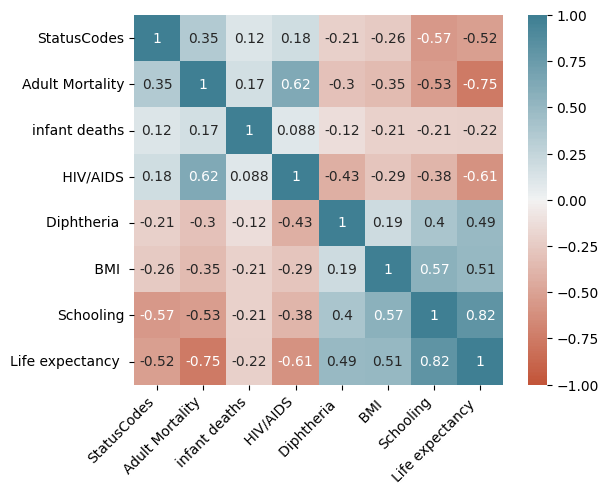

In [51]:
graphWidth = 8
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


In [52]:
df

,StatusCodes,Adult Mortality,infant deaths,HIV/AIDS,Diphtheria,BMI,Schooling,Life expectancy
0,1,263.0,62,0.1,65.0,19.1,10.1,65.0
16,1,74.0,0,0.1,99.0,58.0,14.2,77.8
32,1,19.0,21,0.1,95.0,59.5,14.4,75.6
48,1,335.0,66,1.9,64.0,23.3,11.4,52.4
64,1,13.0,0,0.2,99.0,47.7,13.9,76.4
...,...,...,...,...,...,...,...,...
2858,1,157.0,9,0.1,87.0,62.1,14.3,74.1
2874,1,127.0,28,0.1,97.0,17.5,12.6,76.0
2890,1,224.0,37,0.1,69.0,41.3,9.0,65.7
2906,1,33.0,27,4.1,9.0,23.4,12.5,61.8


In [53]:
# make sure that individual measurements are in rows (measurements sets are in columns)
#a = df.drop(['Life expectancy ', 'Country'], axis=1).values
df.dropna(subset = interesting_cols, inplace=True)
a = np.array(df[reg_columns].values)
b = np.array(df[result_col].values)
#b = b.reshape(-1,1)
U, S, VT = np.linalg.svd(a, full_matrices=False)
# least square fit
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b 

LSE:8099.7393100602985


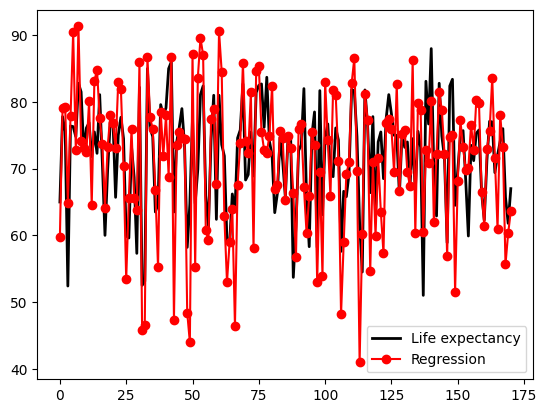

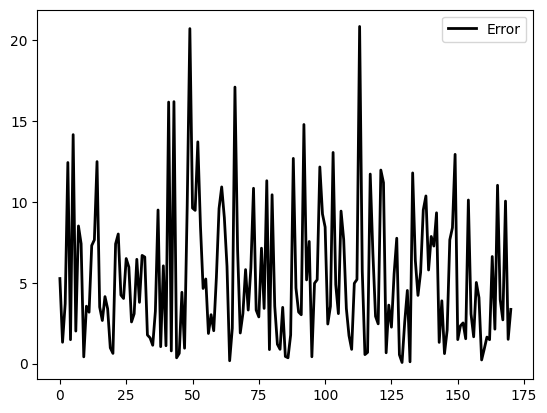

In [57]:
print("LSE:" + str(np.sum((b-a@x)*(b-a@x))))
plt.plot(b, color='k', linewidth=2, label='Life expectancy') # True relationship
plt.plot(a@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.legend()
plt.show()

plt.plot(np.abs(b-a@x), color='k', linewidth=2, label='Error') # True relationship
plt.legend()
plt.show()

Note that there is some systematic error. Lets try to center the mean.

In [50]:
a = np.array(df[reg_columns].values)
b = np.array(df[result_col].values - df[result_col].mean())
#b = b.reshape(-1,1)
U, S, VT = np.linalg.svd(a, full_matrices=False)
# least square fit
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b 

8099.7393100602985

array([[2.76906337e+01],
       [1.74140606e+00],
       [1.37458336e+01],
       [1.54848933e+02],
       [2.18441924e+00],
       [2.00786910e+02],
       [4.04427400e+00],
       [7.25466071e+01],
       [5.50573961e+01],
       [1.72568452e-01],
       [1.26087100e+01],
       [1.01102804e+01],
       [5.33603434e+01],
       [5.86278425e+01],
       [1.56268978e+02],
       [1.22362912e+01],
       [7.10601010e+00],
       [1.71747717e+01],
       [1.15177424e+01],
       [9.44685691e-01],
       [3.97457752e-01],
       [5.48571188e+01],
       [6.43221262e+01],
       [1.79833636e+01],
       [1.62337368e+01],
       [4.22541027e+01],
       [3.56717197e+01],
       [6.63594458e+00],
       [9.49224900e+00],
       [4.16290526e+01],
       [1.43676719e+01],
       [4.48131965e+01],
       [4.34590596e+01],
       [3.12484100e+00],
       [2.52712419e+00],
       [1.28434316e+00],
       [1.04897125e+01],
       [9.03438618e+01],
       [1.09427621e+00],
       [3.65938896e+01],
